In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

## Goals for this group activity:

This notebook will provide:

- intro to image as data
- intro to rgb color space
- test your knowledge of norms

##  Image as Data

A picture, in the real world, is a two-dimensional representation of something.  That _something_ can be three-dimensional or itself flat.



![ text](waldo1.png)



We will use the library `skimage` to import the image:

In [2]:
from skimage.io import imread

In [3]:
waldo_color_filename = 'waldo1.png'
waldo_color = imread( waldo_color_filename )

We can display the image using `plt.imshow`

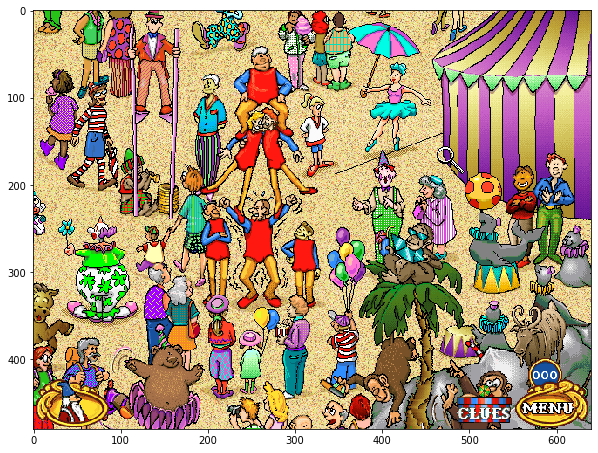

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(waldo_color)

Now your image is represented in the form of a numpy array:

In [5]:
type(waldo_color)

numpy.ndarray

**Try this!**

And you can start performing computations just like you do with other data. For example, take a look at the shape your image data:

In [6]:
#clear
waldo_color.shape

(480, 640, 4)

##### Why do we have "4 layers" representing the above image, instead of 1? 
We will soon be talking about this! But let's first see how we can get images from just one layer.

## Gray scale

Here we create a 5x5 array of random numbers between 0 and 1. In the example below, we use a gray scale mapping for the colors, where 0 corresponds to black and 1 corresponds to white.

[[0.1223274  0.10504098 0.46733594 0.86785183 0.65573677]
 [0.42396344 0.79046865 0.80306521 0.83150324 0.91495218]
 [0.18595354 0.88293324 0.18100236 0.90088522 0.82688507]
 [0.37334334 0.57784541 0.34007731 0.83127605 0.93234668]
 [0.6565331  0.32868277 0.0394219  0.1171491  0.3024364 ]]


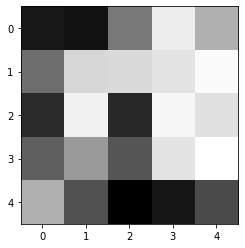

In [7]:
random_colors = np.random.rand(25).reshape(5,5)
print(random_colors)
plt.imshow(random_colors, cmap='gray' )

## RGB Colors

RGB color space constructs all the colors from the combination of the Red, Green and Blue colors (it is just a linear combination!)

In our grayscale image, each pixel tone is defined by a value between 0 and 1. In a colored image, each pixel color is obtained by a given amount of red, given amount of green and a given amount of blue, and are stored in [24 bits](https://en.wikipedia.org/wiki/Color_depth#True_color_(24-bit)) format: 8 bits to describe the amount of each color (red, green, and blue). RBGA color space adds 8 bits to describe the _alpha_ channel, or transparency of the pixel.  The illustration below shows how different colors can be represented using 24 bits (not including the transparency channel):

![](pixel_color.png)




Recall that $(11111111)_{2} = (255)_{10}$, meaning that each color value will vary from 0 to 255.

## 3D array for color images

We can now think of your colored image as a three dimensional array, where each layer of the array corresponds to a different color channel.

![](color_layers.png)

## Back to the Waldo Image

**Try this!**

We can inspect the entries of the color Waldo image `waldo_color`. Take a look at the maximum value and the minimum value.

In [8]:
#clear
print(waldo_color.min())
print(waldo_color.max())

0
255


and observe that indeed the values for each pixel vary between 0 and 255. We now know that the "4 layers" correspond to each RGB channel, and the transparency channel. We can use Python slicing to get the color for a given pixel:

In [9]:
waldo_color[4,5,:]

array([231, 227, 134, 255], dtype=uint8)

## Help us finding Waldo!

Waldo's gone missing again.
Time to solve the problem once and for all with the power of <em>norms</em>.
    Norms provide a measure of 'magnitude' for a vector or 'distance' given the difference between two vectors.
    For arrays that represent images (as in this problem), a small distance indicates a high degree of similarity between images.

To make this problem simpler, we will first convert the image from rgb scale to grayscale, such that our image can be represented by a matrix (only one laywer). We will again use the library `skimage`:

In [10]:
from skimage.color import rgb2gray
from skimage.color import rgba2rgb

In [11]:
waldo_gray = rgb2gray(rgba2rgb(waldo_color))
waldo_gray.max()

1.0

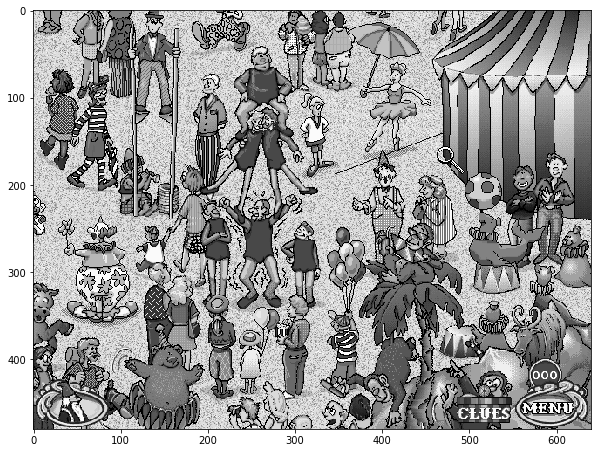

In [12]:
plt.figure(figsize = (10,10))
plt.imshow(waldo_gray,cmap='gray')

Check the shape of your new image `waldo_gray`:

In [13]:
waldo_gray.shape

(480, 640)

Great! We now have the image represented as a matrix.

For this problem, we want to use the **$2$-norm (or Euclidean norm)**. A vector $2$-norm $||\mathbf x||_2$ assigns to every vector $\mathbf{x}\in\mathbb{R}^n$ a nonnegative number by $$||\mathbf{x}||_2 = {\left(\sum^n x^2_i \right)}^{1/2}. $$

The function <code>numpy.linalg.norm</code> computes by default the vector $2$-norm.

We could flatten the image, to transform it from a 2d array into a 1d array, and then apply the vector $2$-norm above. 


In [14]:
waldo_gray.flatten().shape

(307200,)

This procedure corresponds to the Frobenius norm (and <strong>not</strong> the induced matrix $2$-norm) which is given by:
$$||X||_F = {\left(\sum^n\sum_{j=1}^m X_{ij}^2 \right)}^{1/2},$$
which is the default norm computed when we use the  function <code>numpy.linalg.norm</code> with a 2d array as input argument.

**Try this!**

Compute the norm of the array `waldo_gray` passing the 2d array as argument, and compare with the result when you pass the flatten 1d array as argument

In [15]:
#clear
print(la.norm(waldo_gray))

print(la.norm(waldo_gray.flatten()))

357.011813624187
357.011813624187


Waldo face is given in the following numpy array:

In [16]:
waldo_face = np.load('face.npy')
waldo_face.shape

(39, 30)

Write a code snippet that finds the image of Waldo's face (given by `waldo_face` ) inside the complete image `waldo_gray`.

- Look through each subimage of `waldo_gray`, with the same dimensions as `waldo_face`,  and find the one where their difference has the minimum **vector $2$-norm**. You are in essence finding the subimage the has the minimum error when comparing to the image given by `waldo_face`.


- Each subimage should be uniquely identified by the position of its top-left-most pixel. In other words, the left-top corner of the image is the reference point, or you can think of location (0,0). All other pixels have location with respect to the top-left corner. A position (i,j) means that the pixel is located i rows below the top-left corner and j columns to the right of the top-left corner.


- Once you've found Waldo's likeliest hiding spot, save that position in <code>top_left</code>, which is a tuple with the (i,j) position.  


- Also save the resulting norm of the difference in <code>min_diff</code>.

The grading code will be checking the variables `top_left` and `min_diff` defined inside the `#grade` cell below:

In [17]:
#grade_clear
height = waldo_face.shape[0]
width = waldo_face.shape[1]
min_diff = la.norm(waldo_gray)

for i in range(waldo_gray.shape[0] - height + 1):
    for j in range(waldo_gray.shape[1] - width + 1):
        sub_matrix = waldo_gray[i:i + height, j:j + width]
        matrix_diff = (waldo_face - sub_matrix)
        vector_norm = la.norm(matrix_diff)
        if vector_norm < min_diff:
            top_left = (i, j)
            min_diff = vector_norm

In [18]:
print( top_left, min_diff )

(76, 60) 0.0


Define the image `waldo_found` that "highlights" Waldo face in the complete image. Here is how you should do this:
      
- Create a copy of `waldo_gray` as `waldo_found`

- Multiplying all pixel values in <code>waldo_found</code> that are **outside** of <code>waldo_face</code> by $0.3$. This will darken the other portion of the image.

In [19]:
#grade_clear
waldo_found = waldo_gray.copy()
mask = np.zeros_like(waldo_found)
i, j = top_left
mask[i:i + height, j:j + width] = 1
waldo_found [mask < 1] *= 0.3

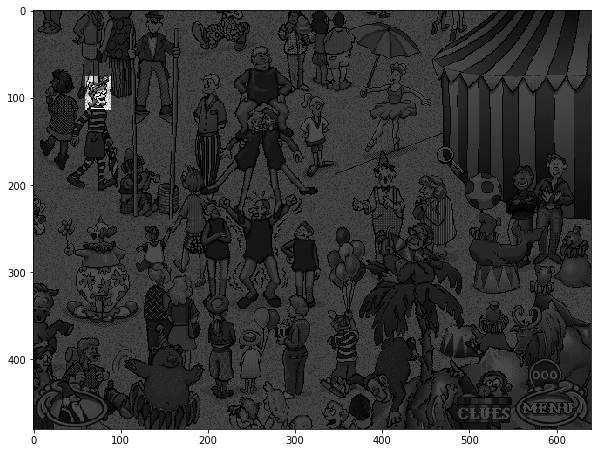

In [20]:
# view image
plt.figure(figsize = (10,10))
plt.imshow(waldo_found, cmap="gray")